# matplotlib tutorial (3) nitta@tsuda.ac.jp

# Chapter 3: Using Japanese Font

<ol>
<li> Download and unzip the Japanese Font, IPAex, distributed by IPA.</li>
<li> Place <i>ipaexg.ttf</i> in the font folder of matplotlib.</li>
<li> Delete the cache file of font.</li>
<li> Restart the runtime.</li>
<li><del>Set to read ipaexg.ttf in the setting file, matplotlibrc, of matplotlib. </del> 
Specify <code>plt.rcParams['font.family'] = 'IPAexGothic'</code> in the python program.</li>
</ol>

## 3-1: Download and expand Japanese font.

There are several versions of the IPAex font.
The latest version at the moment (2022/03/25) is Ver.004.01.

<a href="https://moji.or.jp/ipafont/ipaex00401/">
https://moji.or.jp/ipafont/ipaex00401/
</a>

This time, IPAex Gothic "ipaexg00401.zip" to download.

Official URL:
<a href="https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip">
https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip
</a>

mirror: 
<a href="http://nw.tsuda.ac.jp/python/matplotlib/ipaexg00401.zip">
http://nw.tsuda.ac.jp/python/matplotlib/ipaexg00401.zip
</a>



In [1]:
FNAME = 'ipaexg00401.zip'
URL = f'https://moji.or.jp/wp-content/ipafont/IPAexfont/{FNAME}'
# URL = f'http://nw.tsuda.ac.jp/python/matplotlib/{FNAME}'

import os
if os.name != 'nt':
    ! wget {URL}
    ! unzip {FNAME}
else:
    import urllib.request
    import zipfile
    urllib.request.urlretrieve(URL, FNAME)
    with zipfile.ZipFile(FNAME, 'r') as f:
        f.extractall('.')

--2022-07-10 03:53:47--  https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip
Resolving moji.or.jp (moji.or.jp)... 157.7.44.215
Connecting to moji.or.jp (moji.or.jp)|157.7.44.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4166255 (4.0M) [application/zip]
Saving to: ‘ipaexg00401.zip’

ipaexg00401.zip     100%[===================>]   3.97M  12.9MB/s    in 0.3s    

2022-07-10 03:53:47 (12.9 MB/s) - ‘ipaexg00401.zip’ saved [4166255/4166255]

Archive:  ipaexg00401.zip
   creating: ipaexg00401/
  inflating: ipaexg00401/ipaexg.ttf  
  inflating: ipaexg00401/IPA_Font_License_Agreement_v1.0.txt  
  inflating: ipaexg00401/Readme_ipaexg00401.txt  


In [2]:
# resolve OS dependencies by nitta
if os.name == 'nt':
    LS = 'dir /w'
    LS_L = 'dir'
    LS_LR = 'dir /s'
    RM_RF = 'rmdir /S /Q'
    CP = 'copy'
else:
    LS = 'ls'
    LS_L = 'ls -al'
    LS_LR = 'ls -lR'
    RM_RF = 'rm -rf'
    CP = 'cp'

## 3-2: Examine the folder that stores the font.

Folders for storing fonts vary from system to system.
The example code below is run on Google Colab.

If you install Anaconda to the path "D:\sys\Anaconda3" on Windows,
here is an example of running jupyter notebook with the python virtual
environment as "book3". <br />


'D:\\sys\\Anaconda3\\envs\\book3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'


In [3]:
# sample code 3-1
import matplotlib

tmp = matplotlib.matplotlib_fname() 
print(tmp)

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [4]:
import os
dpath, fname = os.path.split(tmp)

fontpath = os.path.join(dpath, 'fonts', 'ttf')
! {LS} {fontpath}

cmb10.ttf			DejaVuSerif.ttf
cmex10.ttf			LICENSE_DEJAVU
cmmi10.ttf			LICENSE_STIX
cmr10.ttf			STIXGeneralBolIta.ttf
cmss10.ttf			STIXGeneralBol.ttf
cmsy10.ttf			STIXGeneralItalic.ttf
cmtt10.ttf			STIXGeneral.ttf
DejaVuSans-BoldOblique.ttf	STIXNonUniBolIta.ttf
DejaVuSans-Bold.ttf		STIXNonUniBol.ttf
DejaVuSansDisplay.ttf		STIXNonUniIta.ttf
DejaVuSansMono-BoldOblique.ttf	STIXNonUni.ttf
DejaVuSansMono-Bold.ttf		STIXSizFiveSymReg.ttf
DejaVuSansMono-Oblique.ttf	STIXSizFourSymBol.ttf
DejaVuSansMono.ttf		STIXSizFourSymReg.ttf
DejaVuSans-Oblique.ttf		STIXSizOneSymBol.ttf
DejaVuSans.ttf			STIXSizOneSymReg.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizThreeSymBol.ttf
DejaVuSerif-Bold.ttf		STIXSizThreeSymReg.ttf
DejaVuSerifDisplay.ttf		STIXSizTwoSymBol.ttf
DejaVuSerif-Italic.ttf		STIXSizTwoSymReg.ttf


In [5]:
SRC = os.path.join('ipaexg00401', 'ipaexg.ttf')
! {CP} {SRC} {fontpath}

## 3-3: Delete the font cache.

With Google Colab, find the location of the font cache by <code>matplotlib.get_cachedir()</code>.
What should be deleted is the fontlist-v<i>XXX</i>.json file, but since it is troublesome, we will delete the entire folder this time.


In [6]:
# font cache path
import matplotlib
cache_path = matplotlib.get_cachedir()
print(cache_path)

! {LS_L} {cache_path}
! {RM_RF} {cache_path}

/root/.cache/matplotlib
total 44
drwxr-xr-x 3 root root  4096 Jul  6 13:32 .
drwxr-xr-x 1 root root  4096 Jul  7 13:19 ..
-rw-r--r-- 1 root root 29337 Jul  6 13:32 fontlist-v310.json
drwxr-xr-x 2 root root  4096 Jul  6 13:32 tex.cache


Windows や Mac の Anaconda で jupyter を動作させている場合は、フォントキャッシュは<code>matplotlib.get_configdir()</code> の下の
fontlist-v<i>XXX</i>.json である。

## 3-4: Restart the runtime.

For Google Colab:
Runtime &rarr; Restart Runtime.

For jupyter notebook on local PC:
Kernel &rarr; Restart.


## 3-5: Use matplotlib by specifying <code>font.family</code>.

Immediately after restarting runtime, Execute the next cell.

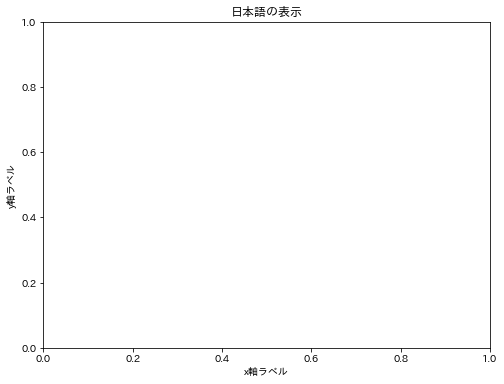

In [1]:
# sample code 3-5
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'IPAexGothic'

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.set_title('日本語の表示')
ax.set_xlabel('x軸ラベル')
ax.set_ylabel('y軸ラベル')

plt.show()